In [ ]:
# instalar
!pip install -U pymoo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


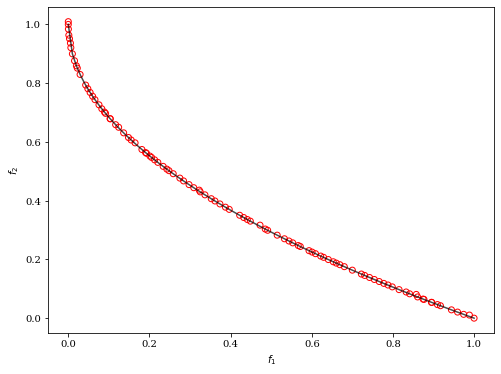

In [ ]:
# Bibliotecas
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problema = get_problem("zdt1")
algoritmo = NSGA2(pop_size=100)
res = minimize(problema, algoritmo, ('n_gen', 200), seed=1, verbose=False)

plot = Scatter()
plot.add(problema.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [ ]:
# SOO - Single Objective Optimization (optimización de un solo objetivo)
# DE - Differential Evolution (Evolución Diferencial)
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.problems import get_problem
from pymoo.operators.sampling.lhs import LHS
from pymoo.optimize import minimize


problema = get_problem("schwefel", n_var=5)
metodo_ed = DE(pop_size=100, sampling=LHS(), variant="DE/rand/1/bin", CR=0.3, dither="vector", jitter=False)

res = minimize(problema, metodo_ed, seed=1, verbose=False)

print("Mejor solución: \nx = %s\nF(x) = %s" % (res.X, res.F))

Mejor solución: 
x = [420.96884744 420.96876821 420.96870428 420.9687717  420.96866676]
F(x) = [6.36402847e-05]


In [ ]:
  print(problema.xl, problema.xu, problema.xl )

[-500. -500. -500. -500. -500.] [500. 500. 500. 500. 500.] [-500. -500. -500. -500. -500.]


In [ ]:
# SOO - Single Objective Optimization (optimización de un solo objetivo)
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.problems import get_problem
from pymoo.operators.sampling.lhs import LHS
from pymoo.optimize import minimize
import numpy as np

problema = get_problem("schwefel", n_var=5)
problema.xl = np.array([400.0, 400.0, 400.0, 400.0, 400.0])
problema.xu = np.array([500.0, 500.0, 500.0, 500.0, 500.0])
metodo_pso = PSO(pop_size=100)

res = minimize(problema, metodo_pso, seed=1, verbose=False)

print("Mejor solución: \nx = %s\nF(x) = %s" % (res.X, res.F))

Mejor solución: 
x = [420.96875146 420.96874949 420.96873135 420.968746   420.96874775]
F(x) = [6.36378645e-05]


In [ ]:
import numpy as np
from pymoo.core.problem import Problem

class funcion_objetivo(Problem):
    def __init__(self):
        super().__init__(n_var=4, n_obj=1, xl=-20.0, xu=20.0)

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = 10*(x[:,1]-x[:,0]**2)**2 + (1-x[:,0])**2 + 90*(x[:,3]-x[:,2]**2)**2 + (1-x[:,2])**2 + 10*(x[:,1]+x[:,3]-2)**2 + 0.1*(x[:,1]-x[:,3])**2


problema = funcion_objetivo()
res = minimize(problema, metodo_pso, seed=1, verbose=False)
print("Mejor solución: \nx = %s\nF(x) = %s" % (res.X, res.F))

res = minimize(problema, metodo_ed, seed=1, verbose=False)
print("Mejor solución: \nx = %s\nF(x) = %s" % (res.X, res.F))

Mejor solución: 
x = [0.99905779 0.9981404  1.00094769 1.00190977]
F(x) = [3.25398568e-06]
Mejor solución: 
x = [1.04559928 1.12042577 0.88357979 0.78667395]
F(x) = [0.12364441]
